# Homework Assignment 7

In [ ]:
!pip install turicreate
!pip install spaCy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 544 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import json
!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 


#!!!fill your api key!!!
api_token = {"username":"","key":""}

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Creating a dataset directory
!mkdir ./datasets

**Question 1:** Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape or Gephi (20pt).


In [ ]:
!mkdir ./datasets/dickens

# download the dataset from Kaggle and unzip it
!kaggle datasets download fuzzyfroghunter/dickens -p ./datasets/
!unzip ./datasets/dickens.zip  -d ./datasets/

 97% 9.00M/9.28M [00:00<00:00, 88.9MB/s]
100% 9.28M/9.28M [00:00<00:00, 82.2MB/s]
Archive:  ./datasets/dickens.zip
  inflating: ./datasets/dickens/1289-0.txt  
  inflating: ./datasets/dickens/1400-0.txt  
  inflating: ./datasets/dickens/1467-0.txt  
  inflating: ./datasets/dickens/27924-0.txt  
  inflating: ./datasets/dickens/564-0.txt  
  inflating: ./datasets/dickens/580-0.txt  
  inflating: ./datasets/dickens/644-0.txt  
  inflating: ./datasets/dickens/650-0.txt  
  inflating: ./datasets/dickens/653-0.txt  
  inflating: ./datasets/dickens/675-0.txt  
  inflating: ./datasets/dickens/678-0.txt  
  inflating: ./datasets/dickens/700-0.txt  
  inflating: ./datasets/dickens/766-0.txt  
  inflating: ./datasets/dickens/786-0.txt  
  inflating: ./datasets/dickens/807-0.txt  
  inflating: ./datasets/dickens/882-0.txt  
  inflating: ./datasets/dickens/883-0.txt  
  inflating: ./datasets/dickens/914-0.txt  
  inflating: ./datasets/dickens/917-0.txt  
  inflating: ./datasets/dickens/924-0.txt  


In [ ]:
import spacy
from tqdm import tqdm
from collections import Counter
import networkx as nx

nlp = spacy.load('en_core_web_lg')

txt = open("./datasets/dickens/pg730.txt").read()
paragraphs_list = txt.split("\n\n")

def get_persons_links(txt):
    links_set = set()
    doc = nlp(txt)
    people = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "PERSON"]
    locations = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "GPE"]

    for person in people:
        for location in locations:
            if person == location or len(person) < 2 or len(location)< 2:
                continue
            # if person > location:
                # person, location = location, person # switch order
            links_set.add((person,location))

    return links_set
links_list = []    
for para in tqdm(paragraphs_list):

    # for each paragraph each link counts only once
    links_list += list(get_persons_links(para))
    

c = Counter(links_list)
c.most_common(40)

100%|██████████| 4088/4088 [01:05<00:00, 62.58it/s]


[(('noah', 'charlotte'), 11),
 (('oliver', 'london'), 9),
 (('claypole', 'charlotte'), 5),
 (('fagin', 'london'), 4),
 (('sowerberry', 'charlotte'), 4),
 (('oliver', 'charlotte'), 4),
 (('oliver', 'pentonville'), 4),
 (('noah', 'london'), 3),
 (('bumble', 'london'), 3),
 (('brownlow', 'london'), 3),
 (('noah claypole', 'charlotte'), 3),
 (('grimwig', 'london'), 2),
 (('nancy', 'london'), 2),
 (('oliver twist', 'charlotte'), 2),
 (('bumble', 'sowerberry'), 2),
 (('oliver', 'barnet'), 2),
 (('oliver', 'the west indies'), 2),
 (('mann', 'london'), 2),
 (('losberne', 'london'), 2),
 (('brownlow', 'paris'), 2),
 (('brownlow', 'rome'), 2),
 (('gutenberg-tm', 'the united states'), 2),
 (('fang', 'xiv'), 1),
 (('bumble', 'xxiv'), 1),
 (('bumble', 'xxii'), 1),
 (('fagin', 'xxiv'), 1),
 (('noah claypole', 'unfavourable'), 1),
 (('li', 'london'), 1),
 (('fang', 'london'), 1),
 (('brownlow', 'xxii'), 1),
 (('xx', 'xxii'), 1),
 (('nancy', 'xxiv'), 1),
 (('li', 'xxiv'), 1),
 (('william sikes', 'xxiv

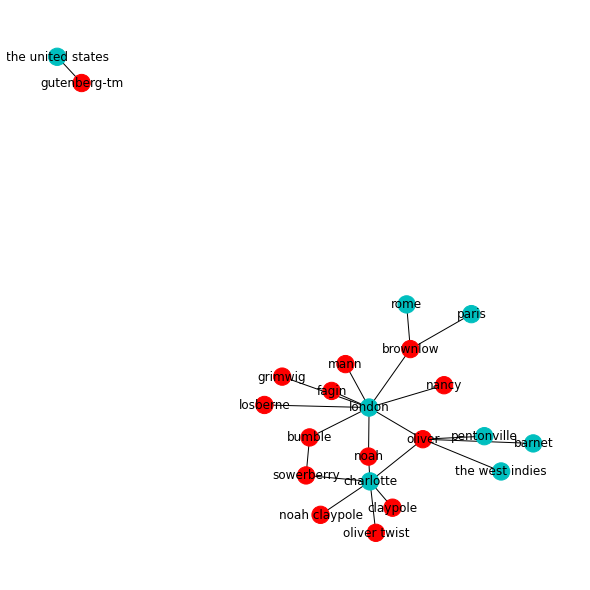

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

g = nx.Graph()

for e,count in dict(c).items():
    if count < 2:
        # only links that appeared at least 6 times
        continue
    person,location = e
    g.add_node(person, type="person")
    g.add_node(location, type="location")
    g.add_edge(person,location, weight=count)
color_map = ['c' if node[1]["type"] == "location" else 'r' for node in g.nodes(data=True)]        
plt.figure(figsize=(8,8))
nx.draw_spring(g, with_labels=True, node_color=color_map) 
nx.write_gml(g, "./datasets/dickens/pg730.gml")

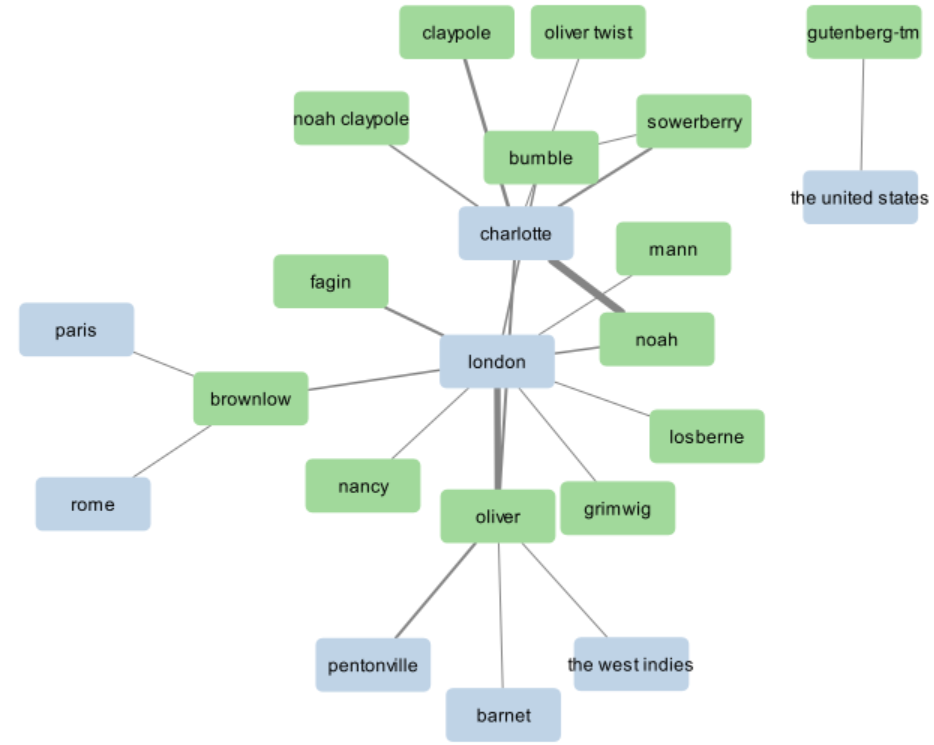

100%|██████████| 1090/1090 [00:18<00:00, 59.35it/s]


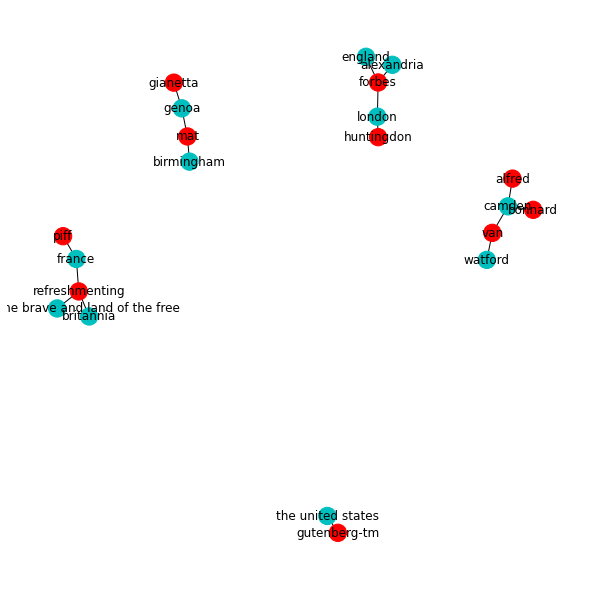

In [ ]:
txt = open("./datasets/dickens/27924-0.txt").read()
paragraphs_list = txt.split("\n\n")
links_list = []    
for para in tqdm(paragraphs_list):

    # for each paragraph each link counts only once
    links_list += list(get_persons_links(para))
c = Counter(links_list)
c.most_common(40)

g = nx.Graph()

for e,count in dict(c).items():
    if count < 2:
        # only links that appeared at least 6 times
        continue
    person,location = e
    g.add_node(person, type="person")
    g.add_node(location, type="location")
    g.add_edge(person,location, weight=count)
color_map = ['c' if node[1]["type"] == "location" else 'r' for node in g.nodes(data=True)]        
plt.figure(figsize=(8,8))
nx.draw_spring(g, with_labels=True, node_color=color_map) 
nx.write_gml(g, "./datasets/dickens/27924-0.gml")

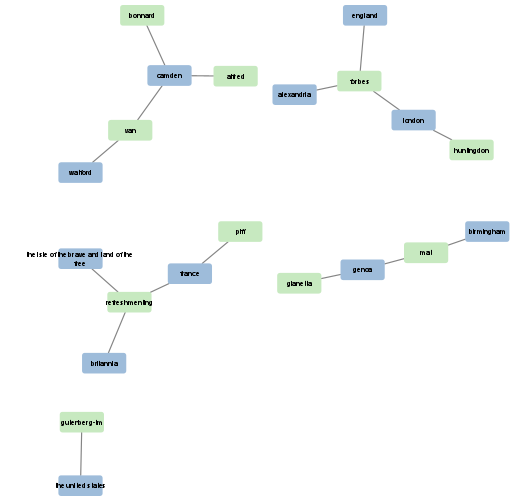

**Question 2:** Use the [Friends TV Show Transcript](https://www.kaggle.com/ryanstonebraker/friends-transcript)
to create and evaluate a classifier that given a line of text can predict
 who is the "friend" that said it (20pt). Using sentiment analysis identify who are the most and less friendly friends (20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [ ]:
!mkdir ./datasets/friends-transcript

# download the dataset from Kaggle and unzip it
!kaggle datasets download ryanstonebraker/friends-transcript -f friends_quotes.csv -p ./datasets/friends-transcript/
!unzip ./datasets/friends-transcript/*.zip  -d ./datasets/friends-transcript
!ls ./datasets/friends-transcript

  0% 0.00/1.72M [00:00<?, ?B/s]
100% 1.72M/1.72M [00:00<00:00, 57.6MB/s]
Archive:  ./datasets/friends-transcript/friends_quotes.csv.zip
  inflating: ./datasets/friends-transcript/friends_quotes.csv  
friends_quotes.csv  friends_quotes.csv.zip


In [ ]:
import turicreate as tc
import re

sf = tc.SFrame.read_csv("./datasets/friends-transcript/friends_quotes.csv")
sf.materialize()
sf
def get_names(names):
    names = str(names).lower().strip()
    r_signs = re.compile(r"\<|\-|\"|\'|\.") 
    if r_signs.search(names) is not None:
      return None
    r_and = re.compile(r"\sand\s")
    if r_and.search(names) is None and ',' not in names:
        return [names]
    l = []
    names = names.replace(",", " and ")
    l = names.split("and")
    r_signs = re.compile(r"\<|\-|\"|\'|\.")
    return [g.strip() for g in l if len(g)<20 and r_signs.search(g) is None]
    
sf['authors'] = sf['author'].apply(lambda g: get_names(g))
sf = sf[sf['authors'] != None]
sf = sf.stack('authors', new_column_name='authors')
sf = sf["episode_number","episode_title","quote","quote_order","season",	"authors"]
sf = sf.rename({"authors": "author"})
sf

Finished parsing file /content/datasets/friends-transcript/friends_quotes.csv

Parsing completed. Parsed 100 lines in 0.267695 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,str,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/friends-transcript/friends_quotes.csv

Parsing completed. Parsed 60291 lines in 0.167081 secs.

episode_number,episode_title,quote,quote_order,season,author
1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0,monica
1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0,joey
1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0,chandler
1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0,phoebe
1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0,phoebe
1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0,monica
1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0,chandler
1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0,chandler
1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0,all
1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0,chandler


In [ ]:
# Filtering to include just the main friends characters
friends = ["phoebe", "chandler", "joey", "rachel", "ross", "monica"]
sf = sf[sf.apply(lambda g: g["author"] in friends)]
sf.materialize()
sf

episode_number,episode_title,quote,quote_order,season,author
1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0,monica
1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0,joey
1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0,chandler
1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0,phoebe
1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0,phoebe
1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0,monica
1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0,chandler
1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0,chandler
1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0,chandler
1.0,Monica Gets A Roommate,Instead of...?,10.0,1.0,joey


In [ ]:
from tqdm import tqdm
import cupy as cp
import numpy as np
import spacy
spacy.require_gpu()
nlp = spacy.load('en_core_web_lg')

l = []
for i in tqdm(range(len(sf))):
    text = sf[i]["quote"]
    l.append(cp.asnumpy(nlp(text).vector))
sf['embedding'] = l 
sf

100%|██████████| 49796/49796 [24:30<00:00, 33.87it/s]


episode_number,episode_title,quote,quote_order,season,author
1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0,monica
1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0,joey
1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0,chandler
1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0,phoebe
1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0,phoebe
1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0,monica
1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0,chandler
1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0,chandler
1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0,chandler
1.0,Monica Gets A Roommate,Instead of...?,10.0,1.0,joey


In [ ]:
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['quote'], n=1, method='word')
sf['words_1grams'] = sf['words_1grams'].dict_trim_by_keys(tc.text_analytics.stop_words(), True)
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['quote'], n=2, method='word')
train, test = sf.random_split(0.8)
cls = tc.random_forest_classifier.create(train,features=['embedding'], target="author")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 37794

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 5.022319     | 0.275546          | 0.213065            | 1.724672          | 1.787239            |

| 2         | 9.984035     | 0.310181          | 0.211055            | 1.712051          | 1.775662            |

| 3         | 14.965182    | 0.329364          | 0.218090            | 1.709082          | 1.772131            |

| 4         | 19.968412    | 0.343705          | 0.221608            | 1.706263          | 1.772004            |

| 5         | 24.935051    | 0.354607          | 0.219095            | 1.705517          | 1.769852            |

| 7         | 34.845030    | 0.368445          | 0.229648            | 1.703999          | 1.767420            |

| 8         | 39.787510    | 0.373763          | 0.231658            | 1.703716          | 1.767418            |

| 9         | 44.812643    | 0.376356          | 0.234171            | 1.703061          | 1.767777            |

| 10        | 49.790782    | 0.380986          | 0.230653            | 1.702766          | 1.767912            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [ ]:
results = cls.evaluate(test)
results

{'accuracy': 0.23631642029564523,
 'auc': 0.582383074106633,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 36
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     joey     |     chandler    |  244  |
 |    monica    |      monica     |  372  |
 |    monica    |      phoebe     |   38  |
 |     joey     |       joey      |  364  |
 |    rachel    |       ross      |  438  |
 |     ross     |      monica     |  209  |
 |    monica    |     chandler    |  277  |
 |    monica    |       ross      |  438  |
 |   chandler   |     chandler    |  315  |
 |   chandler   |       ross      |  411  |
 +--------------+-----------------+-------+
 [36 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.21777757704889286,
 'log_loss': 1.7663629301542796

Sentiment Analysis


In [ ]:
!pip install afinn
!pip install TextBlob

     |████████████████████████████████| 52 kB 984 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=03cf9a9648011bcfe0c5db3a87d78f10366a45b0abb13b1645a157d2b5026c6b
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
# import turicreate.aggregate as agg
from afinn import Afinn
from textblob import TextBlob
afinn = Afinn()

sf['text_blob_polarity'] = sf['quote'].apply(lambda t: TextBlob(t).sentiment.polarity)
sf['afinn_score'] = sf['quote'].apply(lambda t: afinn.score(t))

mean_sf = sf.groupby(['author'], {'affin_score_mean':tc.aggregate.MEAN('afinn_score'), 'text_blob_polarity_mean':tc.aggregate.MEAN('text_blob_polarity')})
print("most friendly")
mean_sf.sort(["affin_score_mean","text_blob_polarity_mean"], ascending=False)

most friendly


author,affin_score_mean,text_blob_polarity_mean
rachel,0.5598181616587202,0.08771908752774821
phoebe,0.5472214618122095,0.0982540432109094
joey,0.5419554455445543,0.08074960349158955
ross,0.48775055679287305,0.08297685222852548
monica,0.459360952496659,0.08001010985937602
chandler,0.4222493887530563,0.08355810619797893


In [ ]:
print("least friendly")
mean_sf.sort(["affin_score_mean","text_blob_polarity_mean"], ascending=True)


least friendly


author,affin_score_mean,text_blob_polarity_mean
chandler,0.4222493887530563,0.08355810619797893
monica,0.459360952496659,0.08001010985937602
ross,0.48775055679287305,0.08297685222852548
joey,0.5419554455445543,0.08074960349158955
phoebe,0.5472214618122095,0.0982540432109094
rachel,0.5598181616587202,0.08771908752774821


season prediction

In [ ]:
# reviews_sf['full_text'] = sf.apply(lambda r: str(r['Summary']+" "+r['Text']).lower())
seasons_quotes = sf.groupby(["season"], {"quotes": tc.aggregate.CONCAT("quote")})

number_of_qutues = 3


In [ ]:
data = {}
data['season'] = []
data['quotes'] = []
for season in seasons_quotes["season"].unique():
  season_quotes = seasons_quotes["season" == season]['quotes']
  for a in range(0,len(season_quotes),number_of_qutues):
    if a+number_of_qutues>len(season_quotes):
      break
    # data.append({"season": season, qutoes = })
    data['season'].append(int(season))
    data['quotes'].append(" ".join(season_quotes[a:a+number_of_qutues]))

In [ ]:
sf_quotes = tc.SFrame(data)

l = []
for i in tqdm(range(len(sf_quotes))):
  # print(sf_quotes[i])
  text = sf_quotes[i]["quotes"]
  l.append(cp.asnumpy(nlp(text).vector))
sf_quotes['embedding'] = l 
sf_quotes

100%|██████████| 18200/18200 [11:00<00:00, 27.54it/s]


quotes,season,embedding
(To Chandler) You toldher! Nancy Thompsons ...,7,[-1.01204187e-011.87473550e-01 ...
"Youre right. I mean Imsorry. Yeah, I shouldnt ...",7,[-9.45673659e-021.40639290e-01 ...
Oh really? Well I-I guessMonica should know about ...,7,[-1.96410250e-022.25918874e-01 ...
"Well, Chandler and I arein a bar Did you not ...",7,[-2.32902132e-022.27021694e-01 ...
(To Chandler) You kisseda guy?!! Oh my God. I ...,7,[-1.70020685e-011.74159959e-01 ...
"Ho-ho, so hard we had tothrow out your underwear ...",7,[-1.14585645e-011.27855703e-01 ...
"Hey. HeyOoh, howsHilda? Is she working ...",7,[ 2.37210318e-022.38302067e-01 ...
"Was she happy you gaveher the job? Oh, my-my ...",7,[-6.34163618e-021.66962668e-01 ...
Sorry. Im sorry Joey.Why would they do that?! ...,7,[-0.10007115 0.23985751-0.2042052 -0.17937972 ...
"You wanna tell secrets?!Okay! Okay! In college, ...",7,[-9.29432958e-021.07412092e-01 ...


In [ ]:
train, test = sf_quotes.random_split(0.8)
cls = tc.classifier.create(train,features=['embedding'], target="season")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 13815

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.368973     | 0.124502          | 0.017857            | 2.294319          | 2.330432            |

| 2         | 4.740643     | 0.128339          | 0.013736            | 2.287238          | 2.357461            |

| 3         | 7.084936     | 0.128484          | 0.009615            | 2.280976          | 2.382120            |

| 4         | 9.392533     | 0.129642          | 0.004121            | 2.275393          | 2.406468            |

| 5         | 11.694299    | 0.130293          | 0.001374            | 2.269169          | 2.433917            |

| 10        | 23.232172    | 0.131379          | 0.000000            | 2.243157          | 2.562017            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 13815

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.998137     | 0.124285          | 0.028846            | 2.286381          | 2.413889            |

| 2         | 3.954351     | 0.126891          | 0.013736            | 2.281522          | 2.401414            |

| 3         | 5.952547     | 0.128990          | 0.002747            | 2.277352          | 2.407898            |

| 4         | 7.914677     | 0.130004          | 0.004121            | 2.277220          | 2.402936            |

| 5         | 9.883966     | 0.129714          | 0.006868            | 2.276879          | 2.400548            |

| 10        | 19.714453    | 0.131162          | 0.002747            | 2.275210          | 2.402692            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 13815

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.355650     | 0.124502          | 0.017857            | 2.279533          | 2.401161            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 13815

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 2709

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.652515     | 0.102280          | 0.092033            |

| 1         | 8        | 5.250000  | 1.492494     | 0.108433          | 0.057692            |

| 2         | 9        | 5.250000  | 1.847961     | 0.109808          | 0.052198            |

| 3         | 11       | 1.263489  | 2.358347     | 0.111980          | 0.049451            |

| 4         | 13       | 0.629129  | 2.857730     | 0.113572          | 0.042582            |

| 9         | 28       | 2.072943  | 6.078654     | 0.116830          | 0.035714            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.0
PROGRESS: RandomForestClassifier          : 0.0027472527472527475
PROGRESS: DecisionTreeClassifier          : 0.017857142857142856
PROGRESS: LogisticClassifier              : 0.03571428571428571
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [ ]:
results = cls.evaluate(test)
results

{'accuracy': 0.04922067268252666,
 'auc': 0.39199107400041144,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 98
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      8       |        4        |   40  |
 |      9       |        4        |   44  |
 |      6       |        6        |   22  |
 |      6       |        1        |   4   |
 |      4       |        6        |   57  |
 |      8       |        10       |   53  |
 |      4       |        10       |   52  |
 |      7       |        5        |   42  |
 |      1       |        10       |   54  |
 |      10      |        6        |   48  |
 +--------------+-----------------+-------+
 [98 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.046735225803785696,
 'log_loss': 2.3530602114173